# Create Charts for RSS Approach

In [1]:
from pathlib import Path


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import json

from tqdm import tqdm

%matplotlib inline

In [2]:
wkdir = Path(r"H:\Meu Drive\Artigo_Mestrado\03_RSS\Outputs_20250615")

out_dir = Path(r"H:\Meu Drive\Artigo_Mestrado\04_Figuras_Imagens")

# Create a file with summary of each Classifier and Setup

In [3]:
list_files = list(wkdir.glob("*_stats.json"))
print(f"Found {len(list_files)} files")

Found 198 files


In [4]:
df = None

In [5]:
for file in tqdm(list_files):
    # Read JASON files
    with open(file, "r") as f:
        data = json.load(f)
        if file == list_files[0]:
            df = pd.DataFrame(data)
        else:
            df_temp = pd.DataFrame(data)
            # concatenate dataframes
            df = pd.concat([df, df_temp], ignore_index=True, sort=True)

  0%|          | 0/198 [00:00<?, ?it/s]

100%|██████████| 198/198 [00:03<00:00, 51.80it/s]


# Concatenate into one Single datafram (without the confusion matrices)

# Create charts

In [6]:
from matplotlib.lines import Line2D

In [7]:
setups_labels = {
    1: "Setup 1 \n[prop, prop + 5%[   [50%, 100%]",
    2: "Setup 2 \n[prop, prop + 5%[   [100%]",
    3: "Setup 3 \n[prop, 100%]    [50%, 100%]",
    4: "Setup 4 \n[prop, 100%]   [100%]",
    5: "Setup 5 \n[prop, prop + 5%[   [prop, 100%]",
    6: "Setup 6 \n[prop, 100%]   [prop, 100%]",
}

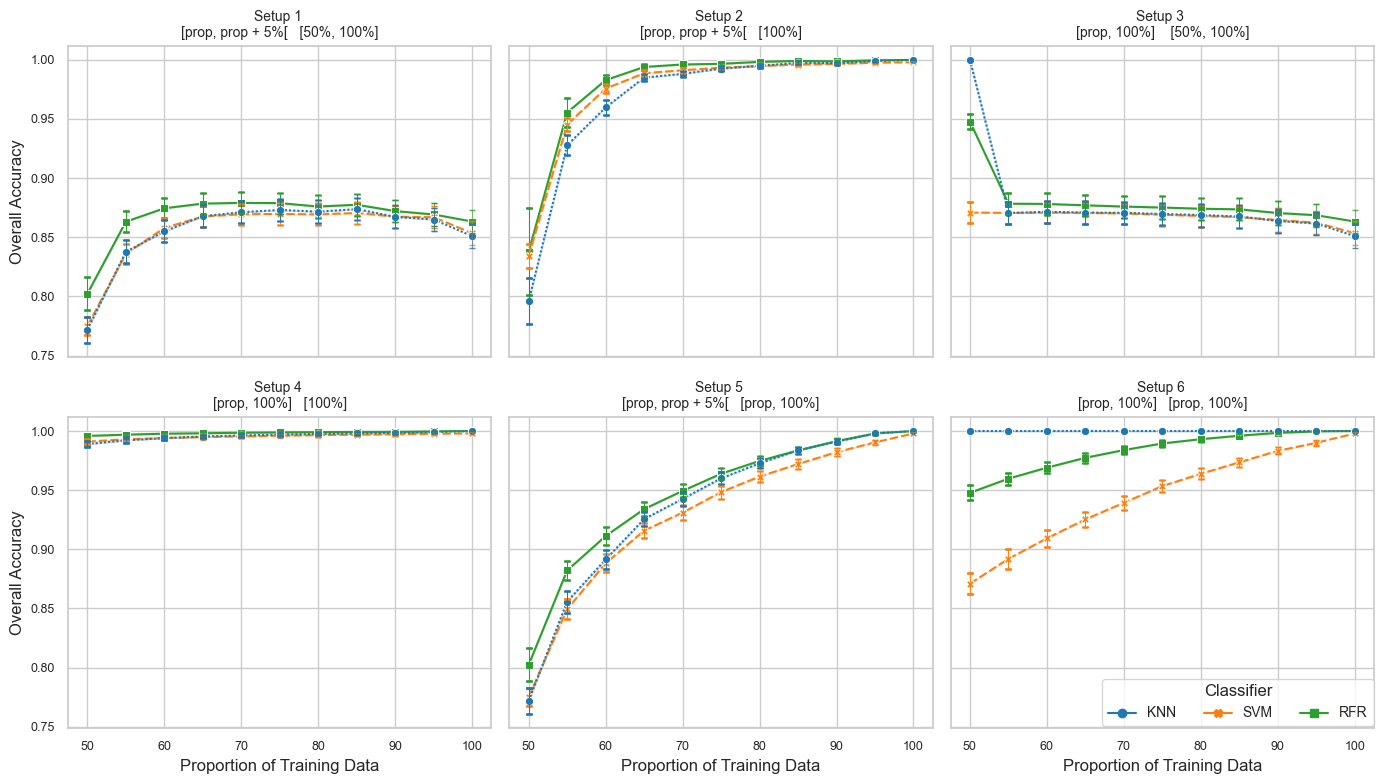

In [8]:

sns.set_theme(style="whitegrid")

# --- Custom styles ---
custom_palette = {
    'KNN': '#1f77b4',  # Blue
    'SVM': '#ff7f0e',  # Orange
    'RFR': '#2ca02c',  # Green
}

custom_markers = {
    'KNN': 'o',
    'SVM': 'X',
    'RFR': 's',
}

n_rows = 2
n_cols = 3
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(14, 8), sharex=True, sharey=True)

for setup in range(1, 7):
    row = (setup - 1) // n_cols
    col = (setup - 1) % n_cols
    current_ax = ax[row, col]

    subset = df[df['setup'] == setup]

    # Plot main lines
    sns.lineplot(
        data=subset,
        x='prop',
        y='accuracy',
        hue='classifier',
        style='classifier',
        markers=custom_markers,
        dashes=True,
        palette=custom_palette,
        ax=current_ax,
        legend=False  # Disable subplot legends
    )

    # Plot error bars for each classifier
    for classifier in subset['classifier'].unique():
        classifier_data = subset[subset['classifier'] == classifier]
        current_ax.errorbar(
            x=classifier_data['prop'],
            y=classifier_data['accuracy'],
            yerr=classifier_data['std_accuracy'],
            fmt='none',
            ecolor=custom_palette[classifier],
            elinewidth=0.5,
            capsize=2,
            alpha=0.8
        )

    current_ax.set_title(setups_labels[setup], fontsize=10)
    current_ax.set_xlabel("Proportion of Training Data")
    current_ax.set_ylabel("Overall Accuracy")
    #current_ax.set_xticks(np.arange(50, 109, 10))
    current_ax.tick_params(axis='both', labelsize=9)

# ---- Global Legend ----

custom_lines = [
    Line2D([0], [0], color=custom_palette[clf], marker=custom_markers[clf], linestyle='-', label=clf)
    for clf in ['KNN', 'SVM', 'RFR']
]

fig.legend(
    handles=custom_lines,
    labels=['KNN', 'SVM', 'RFR'],
    title='Classifier',
    loc='upper center',
    ncol=3,
    frameon=True,
    fontsize=10,
    bbox_to_anchor=(0.89, 0.15),
)

out_name = Path(out_dir, "accuracy_vs_prop.pdf")

plt.tight_layout()
#plt.subplots_adjust(top=0.85, hspace=0.4, wspace=0.1)
plt.savefig(out_name, bbox_inches='tight', dpi=300, transparent=True)
plt.savefig(out_name.with_suffix('.png'), bbox_inches='tight', dpi=300, transparent=True)
plt.show()



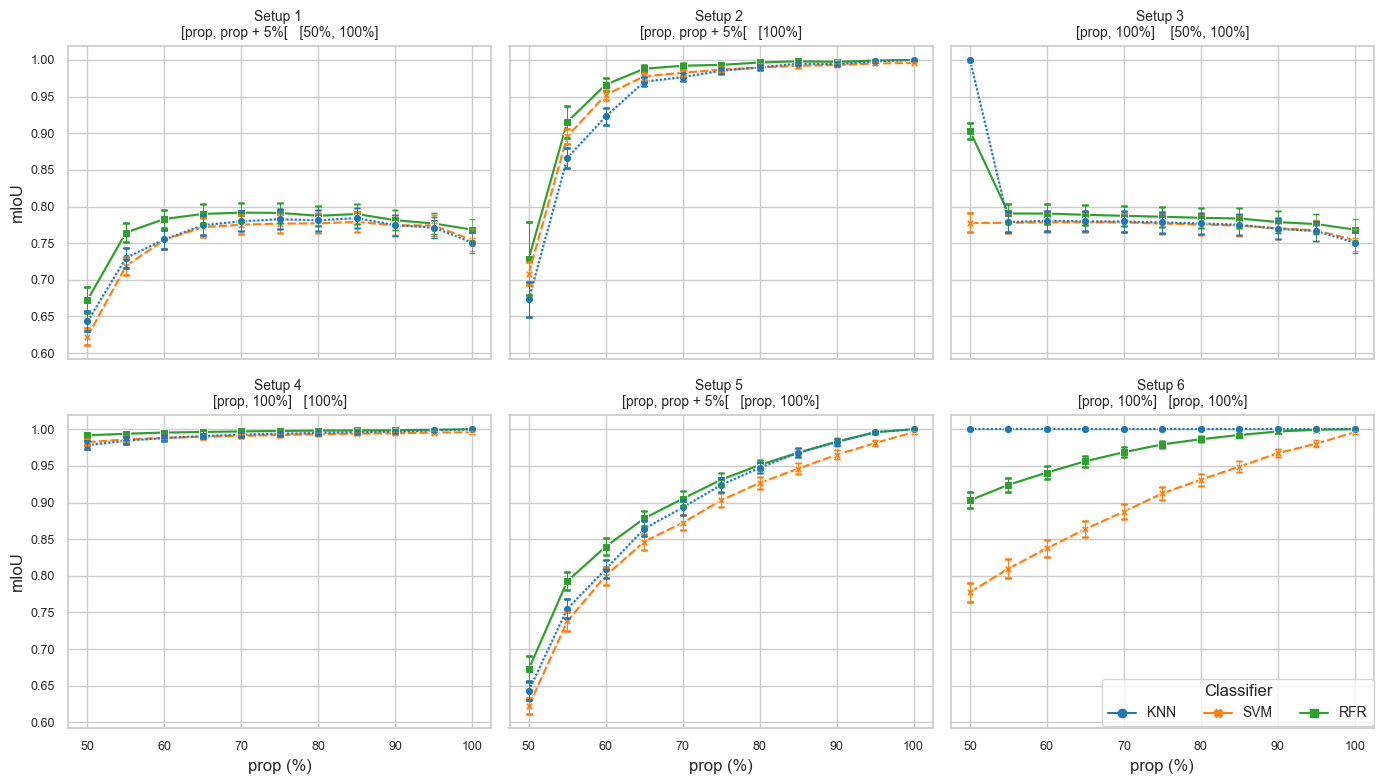

In [9]:

sns.set_theme(style="whitegrid")

# --- Custom styles ---
custom_palette = {
    'KNN': '#1f77b4',  # Blue
    'SVM': '#ff7f0e',  # Orange
    'RFR': '#2ca02c',  # Green
}

custom_markers = {
    'KNN': 'o',
    'SVM': 'X',
    'RFR': 's',
}

n_rows = 2
n_cols = 3
fig, ax = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(14, 8), sharex=True, sharey=True)

for setup in range(1, 7):
    row = (setup - 1) // n_cols
    col = (setup - 1) % n_cols
    current_ax = ax[row, col]

    subset = df[df['setup'] == setup]

    # Plot main lines
    sns.lineplot(
        data=subset,
        x='prop',
        y='mIou',
        hue='classifier',
        style='classifier',
        markers=custom_markers,
        dashes=True,
        palette=custom_palette,
        ax=current_ax,
        legend=False  # Disable subplot legends
    )

    # Plot error bars for each classifier
    for classifier in subset['classifier'].unique():
        classifier_data = subset[subset['classifier'] == classifier]
        current_ax.errorbar(
            x=classifier_data['prop'],
            y=classifier_data['mIou'],
            yerr=classifier_data['std_mIou'],
            fmt='none',
            ecolor=custom_palette[classifier],
            elinewidth=0.5,
            capsize=2,
            alpha=0.8
        )

    current_ax.set_title(setups_labels[setup], fontsize=10)
    current_ax.set_xlabel("prop (%)")
    current_ax.set_ylabel("mIoU")
    #current_ax.set_xticks(np.arange(50, 109, 10))
    current_ax.tick_params(axis='both', labelsize=9)

# ---- Global Legend ----

custom_lines = [
    Line2D([0], [0], color=custom_palette[clf], marker=custom_markers[clf], linestyle='-', label=clf)
    for clf in ['KNN', 'SVM', 'RFR']
]

fig.legend(
    handles=custom_lines,
    labels=['KNN', 'SVM', 'RFR'],
    title='Classifier',
    loc='upper center',
    ncol=3,
    frameon=True,
    fontsize=10,
    bbox_to_anchor=(0.89, 0.15),
)

plt.tight_layout()
out_name = Path(out_dir, "mIoU_versus_prop.pdf")
#plt.subplots_adjust(top=0.85, hspace=0.4, wspace=0.1)
plt.savefig(out_name, bbox_inches='tight', dpi=300, transparent=True)
plt.savefig(out_name.with_suffix('.png'), bbox_inches='tight', dpi=300, transparent=True)
plt.show()



# Completeness (Precision x Recall)

In [10]:
classes = ['Forest', 'Water', 'Crops', 'Bare Soil']

# Compute precision and recall for each class
def compute_precision_recall(confusion_matrix):
    precision = []
    recall = []
    for i in range(len(classes)):
        tp = confusion_matrix[i, i]
        fp = confusion_matrix[:, i].sum() - tp
        fn = confusion_matrix[i, :].sum() - tp
        
        if tp + fp > 0:
            precision.append(tp / (tp + fp))
        else:
            precision.append(0.0)
        
        if tp + fn > 0:
            recall.append(tp / (tp + fn))
        else:
            recall.append(0.0)
    
    return precision, recall

# Create a new DataFrame to store precision and recall
precision_recall_data = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    confusion_matrix = np.array(row['confusion_matrix'])
    precision, recall = compute_precision_recall(confusion_matrix)
    
    for i, cls in enumerate(classes):
        precision_recall_data.append({
            'setup': row['setup'],
            'classifier': row['classifier'],
            'prop': row['prop'],
            'class': cls,
            'precision': float(precision[i]),
            'recall': float(recall[i])
        })

100%|██████████| 1188/1188 [00:00<00:00, 10500.41it/s]


In [11]:
df_completeness = pd.DataFrame(precision_recall_data)

df_completeness

,setup,classifier,prop,class,precision,recall
0,1,RFR,50,Forest,0.759081,0.869380
1,1,RFR,50,Water,0.950001,0.994360
2,1,RFR,50,Crops,0.763873,0.405598
3,1,RFR,50,Bare Soil,0.735815,0.939654
4,1,RFR,50,Forest,0.759081,0.869380
...,...,...,...,...,...,...
4747,6,KNN,95,Bare Soil,1.000000,1.000000
4748,6,KNN,100,Forest,1.000000,1.000000
4749,6,KNN,100,Water,1.000000,1.000000
4750,6,KNN,100,Crops,1.000000,1.000000


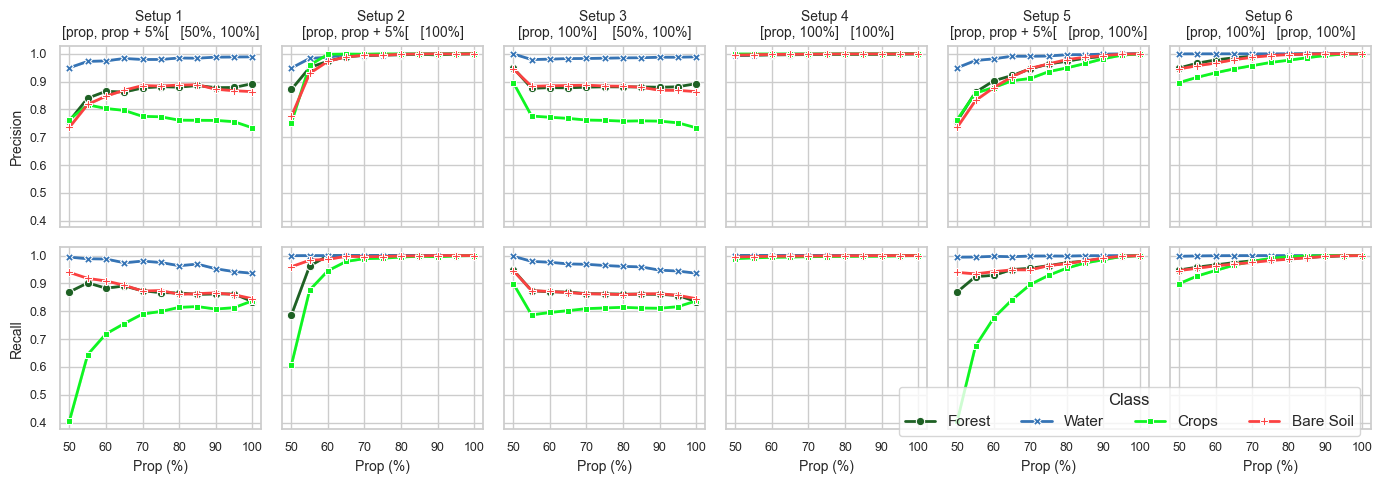

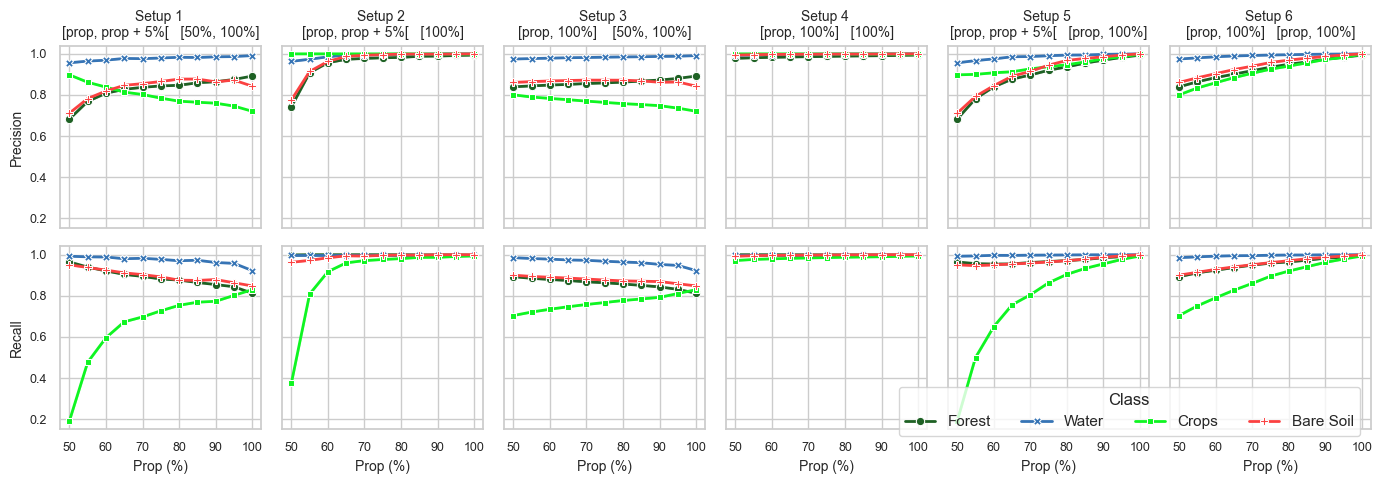

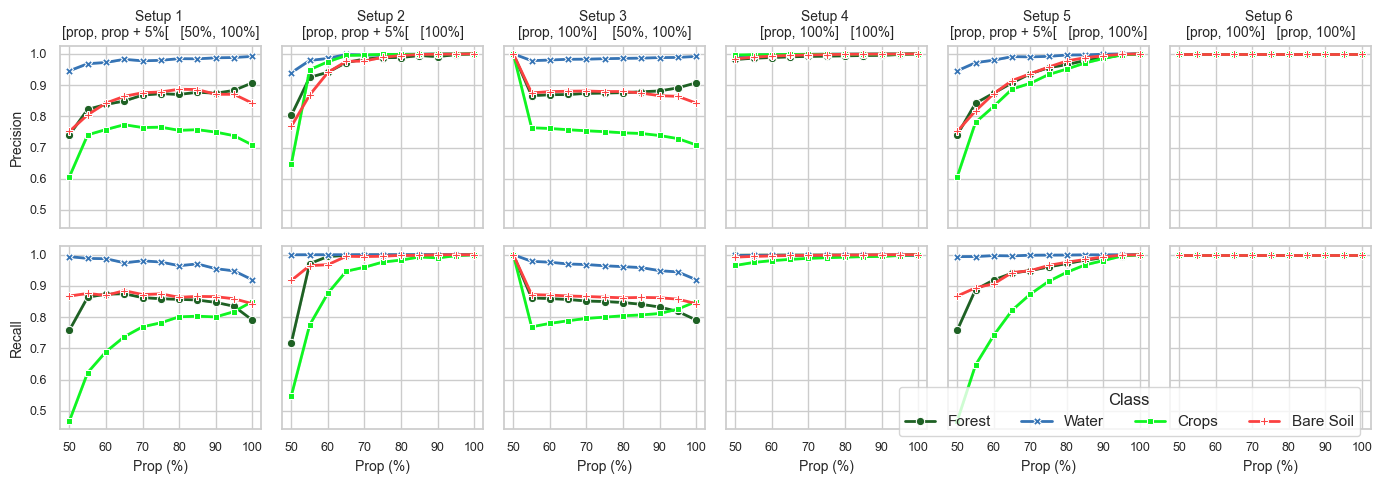

In [13]:

setup_list = [1, 2, 3, 4, 5, 6]
clf = "RFR"

for clf in ['RFR', 'SVM', 'KNN']:

    colour_palette = ['#1e6124', '#3674B5', '#0ff522', '#FB4141']

    font_size = 10

    fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(14, 5), sharex=True, sharey=True)

    for col_idx, setup in enumerate(setup_list):
        subset = df_completeness[
            (df_completeness['setup'] == setup) &
            (df_completeness['classifier'] == clf)
        ]
        
        # Precision plot (Row 0)
        sns.lineplot(
            data=subset,
            x='prop',
            y='precision',
            hue='class',
            style='class',
            markers=True,
            dashes=False,
            palette=colour_palette,
            linewidth=2,
            ax=ax[0, col_idx]
        )
        ax[0, col_idx].set_title(setups_labels[setup], fontsize=font_size)
        ax[0, col_idx].set_xlabel('')
        ax[0, col_idx].set_ylabel('Precision' if col_idx == 0 else '', fontsize=font_size)
        
        # Only show legend in first subplot
        #if col_idx != 0:
        ax[0, col_idx].get_legend().remove()

        # Recall plot (Row 1)
        sns.lineplot(
            data=subset,
            x='prop',
            y='recall',
            hue='class',
            style='class',
            markers=True,
            dashes=False,
            palette=colour_palette,
            linewidth=2,
            ax=ax[1, col_idx]
        )
        #ax[1, col_idx].set_title(f'Setup {setup} - Recall', fontsize=8)
        ax[1, col_idx].set_xlabel('Prop (%)', fontsize=font_size)
        ax[1, col_idx].set_ylabel('Recall' if col_idx == 0 else '', fontsize=font_size)

        #if col_idx != 0:
        ax[1, col_idx].get_legend().remove()

    # Adjust layout and put legend only once
    handles, labels = ax[0, 0].get_legend_handles_labels()

    # Adjust x-ticks
    for ax_row in ax:
        for a in ax_row:
            a.set_xticks(np.arange(50, 110, 10))
            a.tick_params(axis='both', labelsize=font_size-1)
    fig.legend(handles, labels, loc=[0.65, 0.1], ncol=4, title='Class')

    # Set location for the legend


    #plt.suptitle(f'Semantic Segmentation - Classifier: {clf}', fontsize=10)
    plt.subplots_adjust(top=0.85, hspace=0.4, wspace=0.1)
    plt.tight_layout()
    out_name = Path(out_dir, f"precision_recall_{clf}.pdf")
    plt.savefig(out_name, bbox_inches='tight', dpi=300, transparent=True)
    plt.savefig(out_name.with_suffix('.png'), bbox_inches='tight', dpi=300, transparent=True)

    plt.show()